# Random Graph Tests

In this notebook, we begin to investigate the Anderson model through the simulation of the d= 2
 case.

The Hamiltonian is given by:

$$\hat{H} = \epsilon_0 \delta_{n, m} - t (\delta_{n+1, m} + \delta_{n-1, m})$$

In [88]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import expm
        

class RandomGraph:
    '''
    Construct and simulate a random graph.
    We represent all wave functions and operators in the lattice site basis. 

    Attributes
        chain (2D ndarray NxN): 
        psi0 (1D ndarray N^2): 
        eps_range (array-like):
        t_hop (float):
        store_history (boolean):
    '''
    def __init__(self, p, num_sites, psi_0, eps_range, t_hop, store_history=True):
        self.chain = np.zeros((num_sites, num_sites))
        self.num_sites = num_sites
        self.psi_0 = psi_0
        self.eps_range = eps_range
        self.t_hop = t_hop # hopping param
        self.p = p
        self.G = nx.erdos_renyi_graph(self.num_sites, self.p)
        self.binding = np.diagflat(np.random.uniform(*self.eps_range, size=self.num_sites))
        self.pos = nx.spring_layout(self.G)

        if store_history:
            self.history = []


    def _hamiltonian(self):
        '''
        Construct the hamiltonian for the Anderson tight-binding model, a matrix representation in the occupancy site basis. 
        but with a random graph instead with probability p
        '''
        A = nx.to_numpy_array(self.G)
        hopping = -1*self.t_hop * A

        return self.binding + hopping
    
    def _time_evolution(self, time):
        '''
        Calculate the unitary time evolution operator for the given hamiltonian.

        Args
            time (float): time when time evolution operator is calculated

        Returns
            U(t) (ndarray of size num_sites x num_sites) 
        '''

        return expm(-1j * self._hamiltonian() * time)
    
    def solveatt(self, time):
        return self._time_evolution(time) @ self.psi_0
    
    def solve(self, t, nt): #t_steps):
        '''
        Calculate psi(t). 

        Args
            t (array-like): time range of form (t_initial, t_final)
            nt (int): number of time steps
        '''        

        times = np.linspace(0, t, nt)
        
        history = []

        for time in times:
            psi_t = self._time_evolution(time) @ self.psi_0
            history.append(psi_t) 
        
        return history
    
    def plotgraph(self):
        nx.draw(self.G)

    def plotdensity(self, t, axisstabilized = False):
        '''
        Plot the probability density, aka |psi(t)|^2

        Args:
            t (float): time to plot it
        '''
        
        fig = plt.figure(figsize = (12,10))
        psi_t = self._time_evolution(t) @ self.psi_0
        density = np.real(np.multiply(psi_t.conj(), psi_t))
        
        plt.title("Wave function probability density at time " + str(t) + "\n p = " + str(self.p)) 
      
        nx.draw(self.G, self.pos, node_color = density, cmap = plt.cm.cividis)
        
        plt.show()
        
        




    

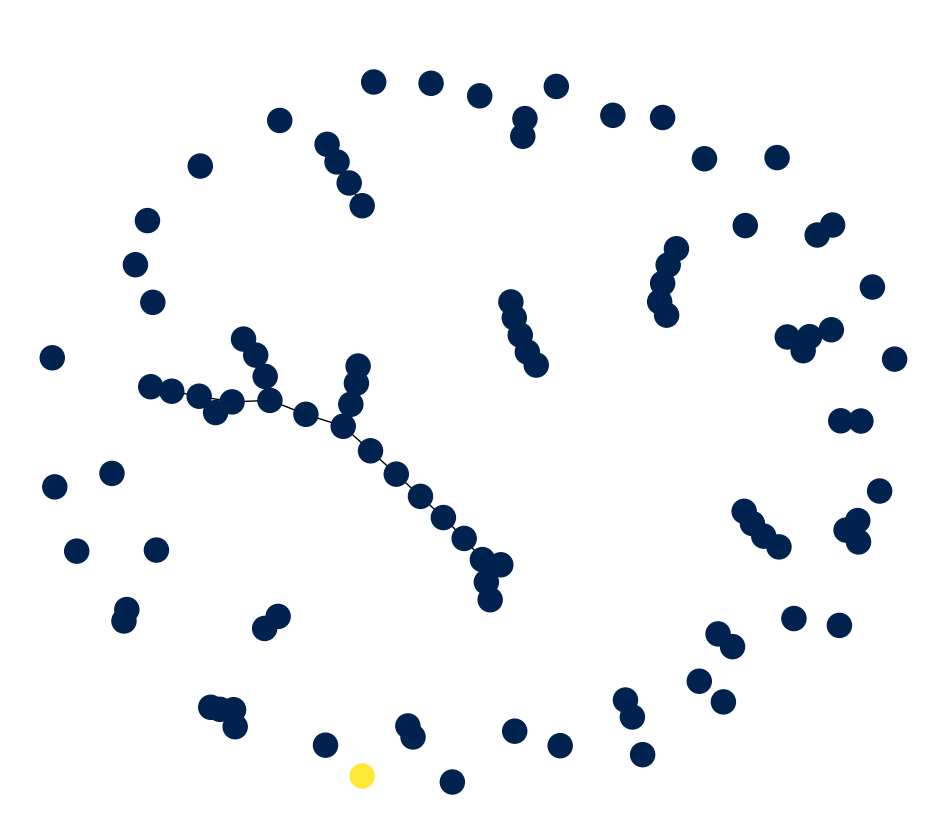

In [81]:
n = 100
psi_0 = np.zeros(n)
psi_0[np.random.randint(n)] = 1
graphy = RandomGraph(0.01, n, psi_0, [0,0], 1)
plotty = graphy.plotdensity(2)

In [82]:
from matplotlib.animation import FuncAnimation

def randomgraphanimation(graphy, t_max, W, p):
    n = graphy.num_sites
    fig = plt.figure(figsize = (12,10))
    plt.style.use('dark_background')
    ax = plt.gca()
    title = 'randomgraphanimation_n_' + str(n) + '_tmax_' + str(t_max)+ '_W_' + str(W) + '_p_' + str(p) + '.gif'

    def update(frame):
        ax.clear()
        psi_t = graphy._time_evolution(frame) @ graphy.psi_0
        density = np.real(np.multiply(psi_t.conj(), psi_t))
        ax.set_title("Wave function probability density at time " + str(frame))
        nx.draw(graphy.G, graphy.pos, node_color = density, cmap = plt.cm.cividis, ax = ax, edge_color = 'white')


    ani = FuncAnimation(fig, update, frames=range(0, t_max), interval=100)
    ani.save(title, writer='ffmpeg', fps=5)
    plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


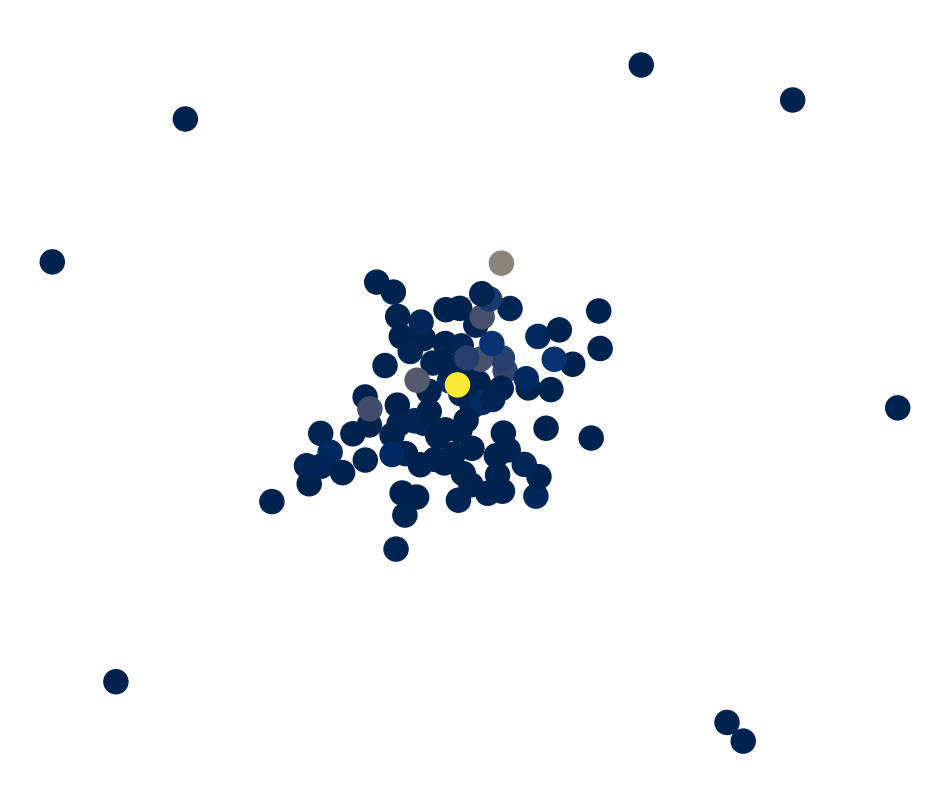

In [87]:
n = 100
psi_0 = np.zeros(n)
psi_0[np.random.randint(n)] = 1
W = 10
p = 0.03
graphy = RandomGraph(p, n, psi_0, [-1*W,W], 1)
randomgraphanimation(graphy, 40, W, p)

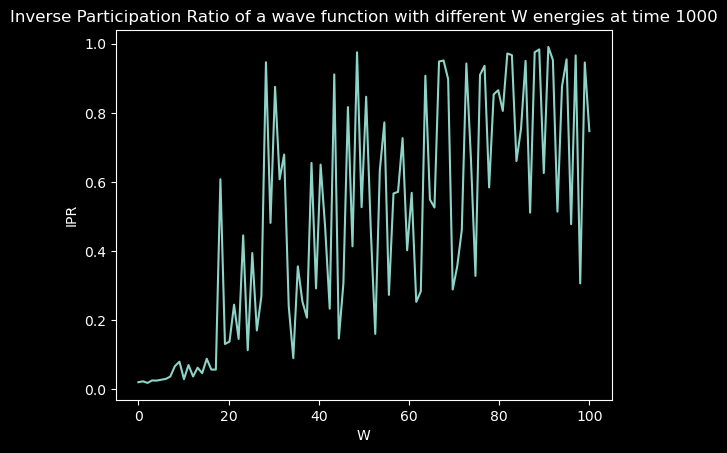

In [98]:
n = 100
psi_0 = np.zeros(n)
x = np.random.randint(n)
psi_0[x] = 1
W = 10
p = 0.1

def magto4(psi):
    newpsi = []
    for x in psi:
        newpsi.append((abs(x))**4)
    return sum(newpsi)

def plotlocalization(graph, tmax):
    hist = torus.solve(tmax, tmax)
    T = np.linspace(0, tmax, tmax)
    localizationlist = []
    for vect in hist:
        localizationlist.append(magto4(vect))
    plt.title("Inverse Participation Ratio (measure of localization) of a wave function over time")
    plt.plot(T, localizationlist)

def localizationfordiffW(Wmax, t, p, n, psi_0, thop):
    Wlist = np.linspace(0, Wmax, Wmax)
    localizationmeasure = []
    for W in Wlist:
        torus = RandomGraph(p, n, psi_0, [-1*W, W], thop)
        psi_t = torus.solveatt(t)
        localizationmeasure.append(magto4(psi_t))  
    plt.xlabel("W")
    plt.ylabel("IPR")
    plt.title("Inverse Participation Ratio of a wave function with different W energies at time "+ str(t))
    plt.plot(Wlist, localizationmeasure)

def localizationfordiffp(prange, pnum, t, n, W, psi_0, thop):
    plist = np.linspace(prange[0], prange[-1], pnum)

localizationfordiffW(100, 1000, p, n, psi_0, 1)